<a href="https://colab.research.google.com/github/aelshehawy/PythonSocialDataScience/blob/main/Session_5_Python23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Today's Plan**


- Pandas Revision
- Mini Visualization
- Scraping the Web
- Twitter API
- Mini NLP

# **Pandas**


![pandas1](https://media.giphy.com/media/Wa5JDuv6kzoTC/giphy.gif)


## Why is Pandas AMAZING?

1. super easy loading in data
2. easy data cleaning
3. easy data manipulation
4. easy merging and extraction



A pandas Series is a one-dimensional array. It holds any data type supported in Python and uses labels to locate each data value for retrieval.

In [ ]:
import pandas as pd 

ser = pd.Series(["My", "name", "is", "ash", "hello"])
ser

0       My
1     name
2       is
3      ash
4    hello
dtype: object

In [ ]:
ser = pd.Series(["My", "name", "is", "ash", "hello"], index = [1,2,3,4,5])
ser

1       My
2     name
3       is
4      ash
5    hello
dtype: object

Create the data as a dict of lists:

We will create again a shopping list!


In [ ]:
my_data = {
    'drygroceries': ["pasta", "rice", "coffee", "beans"],
    'milkproducts': ["cheese", "cream", "sour cream", "yogurt"],
    'drinks': ['tea', 'coffee', 'water', 'juice']
}

In [ ]:

# Index is also optional
my_index = ['a', 'b', 'c', 'd']

In [ ]:
df = pd.DataFrame(data=my_data,index=my_index)
df

,drygroceries,milkproducts,drinks
a,pasta,cheese,tea
b,rice,cream,coffee
c,coffee,sour cream,water
d,beans,yogurt,juice


### Lets learn to load data in pandas

We are going to start with yesterdays data - German Sputnik Newspaper articles

**Lets try with pandas**

In [ ]:
sputnikdata1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv')

#why do we get an error message?

ParserError: ignored

In [ ]:
import pandas as pd

sputnikdata1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv',sep='\t')
sputnikdata1.head()
#what do we want to change here

,http://de.sputniknews.compolitik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz,http://web.archive.org/web/20170227192503/https://de.sputniknews.com/amp/politik/20160107306965193-Lindner-Merkel-Migrationspolitik-Chaos-Einwanderungsgesetz/,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik führt Europa ins Chaos,"Der Satz „Wir schaffen das“ der Bundeskanzlerin ersetze kein Regierungshandeln, so Lindner. Seiner Meinung nach ist ein „rationales, humanitäres, europäisch abgestimmtes Einwanderungsgesetz“ nötig, welches eine systematisierte Registrierung von Flüchtlingen und deren legale Integration ermöglichen würde. Die CDU/CSU-Politiker hatten von Merkel wiederholt gefordert, den Migranten-Zustrom zu begrenzen. Doch die Kanzlerin hat sich bislang geweigert, eine Obergrenze für Flüchtlinge festzulegen, was die Grenzschließung für neu ankommende Migranten bedeuten würde.",OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646110198091
0,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350
1,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179
2,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637
3,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927
4,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957


In [ ]:
#first line is not header
sputnikdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv',sep='\t', header=None)
sputnikdata

,0,1,2,3,4,5,6,7,8
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957
6,http://de.sputniknews.comkarikatur/20151020305...,http://web.archive.org/web/20181201153825/http...,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ...",OVER-THRESHOLD,migrationsproblem asylpolitik flüchtlinge,522,0.544158
7,http://de.sputniknews.com/german.ruvr.ru/news/...,http://web.archive.org/web/20150726055154/http...,20140106,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...,OVER-THRESHOLD,migranten,83,0.544010
8,http://de.sputniknews.compolitik/2018081332193...,http://web.archive.org/web/20180813172522/http...,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...,OVER-THRESHOLD,flüchtlingen flüchtlinge,163,0.543707
9,http://de.sputniknews.compolitik/2017021931460...,http://web.archive.org/web/20170324060955/http...,20170219,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...,OVER-THRESHOLD,migration asylbewerber,79,0.543063


## Select Column

### how would I select the date?

In [ ]:
sputnikdata_date=sputnikdata[2]
sputnikdata_date

0     20160107
1     20150210
2     20181117
3     20181109
4     20160306
5     20151016
6     20151020
7     20140106
8     20180813
9     20170219
10    20151228
11    20160614
12    20181210
13    20151102
14    20170307
15    20170207
16    20180619
17    20180914
18    20131106
19    20170715
Name: 2, dtype: int64

### Select only content and title


In [ ]:
sputnikdata_content_title=sputnikdata[[3,4]]
sputnikdata_content_title

## Select rows

In [ ]:
#select 0-5

sputnikdata_rows=sputnikdata[0:1]
sputnikdata_rows

## Exporting data from Pandas


In [ ]:
df.to_csv("mydata.csv", sep='\t', encoding='utf-8')

## Combining Datasets

We look at two commands in particular. For an in-depth explanation, see: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [ ]:
import pandas as pd 
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv',sep='\t',header=None)
df

,0,1,2,3,4,5,6,7,8
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957
6,http://de.sputniknews.comkarikatur/20151020305...,http://web.archive.org/web/20181201153825/http...,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ...",OVER-THRESHOLD,migrationsproblem asylpolitik flüchtlinge,522,0.544158
7,http://de.sputniknews.com/german.ruvr.ru/news/...,http://web.archive.org/web/20150726055154/http...,20140106,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...,OVER-THRESHOLD,migranten,83,0.544010
8,http://de.sputniknews.compolitik/2018081332193...,http://web.archive.org/web/20180813172522/http...,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...,OVER-THRESHOLD,flüchtlingen flüchtlinge,163,0.543707
9,http://de.sputniknews.compolitik/2017021931460...,http://web.archive.org/web/20170324060955/http...,20170219,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...,OVER-THRESHOLD,migration asylbewerber,79,0.543063


In [ ]:

#what if I want to rename?

col_name_dict =  {
    0: 'link1',
    1: 'link2',
    2: 'date',
    3: 'title',
    4: 'text',
    5: 'marker',
    6: 'keywords',
    7: 'numberwords',
    8: 'score'
}
df = df.rename(col_name_dict, axis=1)
df

,link1,link2,date,title,text,marker,keywords,numberwords,score
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957
6,http://de.sputniknews.comkarikatur/20151020305...,http://web.archive.org/web/20181201153825/http...,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ...",OVER-THRESHOLD,migrationsproblem asylpolitik flüchtlinge,522,0.544158
7,http://de.sputniknews.com/german.ruvr.ru/news/...,http://web.archive.org/web/20150726055154/http...,20140106,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...,OVER-THRESHOLD,migranten,83,0.544010
8,http://de.sputniknews.compolitik/2018081332193...,http://web.archive.org/web/20180813172522/http...,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...,OVER-THRESHOLD,flüchtlingen flüchtlinge,163,0.543707
9,http://de.sputniknews.compolitik/2017021931460...,http://web.archive.org/web/20170324060955/http...,20170219,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...,OVER-THRESHOLD,migration asylbewerber,79,0.543063


In [ ]:
df

,link1,link2,date,title,text,marker,keywords,numberwords,score
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957
6,http://de.sputniknews.comkarikatur/20151020305...,http://web.archive.org/web/20181201153825/http...,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ...",OVER-THRESHOLD,migrationsproblem asylpolitik flüchtlinge,522,0.544158
7,http://de.sputniknews.com/german.ruvr.ru/news/...,http://web.archive.org/web/20150726055154/http...,20140106,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...,OVER-THRESHOLD,migranten,83,0.544010
8,http://de.sputniknews.compolitik/2018081332193...,http://web.archive.org/web/20180813172522/http...,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...,OVER-THRESHOLD,flüchtlingen flüchtlinge,163,0.543707
9,http://de.sputniknews.compolitik/2017021931460...,http://web.archive.org/web/20170324060955/http...,20170219,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...,OVER-THRESHOLD,migration asylbewerber,79,0.543063


In [ ]:
df1 = df.loc[:, ['link1', 'link2', 'title']]
df2 = df.loc[:, ['date', 'text','link1']]

In [ ]:
df1

In [ ]:
df2

In [ ]:
print(df1.shape)
print(df2.shape)
print(df.shape)


### `pd.merge`

In [ ]:
pd.merge(df1, df2, on="link1")

# Visualization through counting

lets pre-process text

In [ ]:
import string
exclude = set(string.punctuation) # if you see this not part of the punctuation -->”
import nltk
nltk.download('stopwords') #you can also download all libraries in nltk at once
from nltk.corpus import stopwords
stop_word_list = stopwords.words('german')
nltk.download('punkt')


def nlp_simple_pipeline(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    text=text.split()
    text = [token for token in text if token not in exclude and token.isalpha()]
    text = [token for token in text if token not in stop_word_list]

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis 22/Python QTA Drive Oxford 2022/Data/sputnikgerman20.tsv',sep='\t',header=None)
dataframe

,0,1,2,3,4,5,6,7,8
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957
6,http://de.sputniknews.comkarikatur/20151020305...,http://web.archive.org/web/20181201153825/http...,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ...",OVER-THRESHOLD,migrationsproblem asylpolitik flüchtlinge,522,0.544158
7,http://de.sputniknews.com/german.ruvr.ru/news/...,http://web.archive.org/web/20150726055154/http...,20140106,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...,OVER-THRESHOLD,migranten,83,0.544010
8,http://de.sputniknews.compolitik/2018081332193...,http://web.archive.org/web/20180813172522/http...,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...,OVER-THRESHOLD,flüchtlingen flüchtlinge,163,0.543707
9,http://de.sputniknews.compolitik/2017021931460...,http://web.archive.org/web/20170324060955/http...,20170219,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...,OVER-THRESHOLD,migration asylbewerber,79,0.543063


In [ ]:
dataframe["cleanedtitle"]=dataframe[3].apply(nlp_simple_pipeline) 
dataframe

,0,1,2,3,4,5,6,7,8,cleanedtitle
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646,"[merkels, flüchtlingspolitik, führt, europa, c..."
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350,"[rund, millionen, wehrpflichtige, ukrainer, ru..."
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179,"[präzisiert, nahles, idee, hartz]"
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637,"[trump, beschränkt, drastisch, asylgewährung, ..."
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927,"[österreich, drängt, deutsches, flüchtlingskon..."
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957,"[warschau, wehrt, merkels, flüchtlingsquote]"
6,http://de.sputniknews.comkarikatur/20151020305...,http://web.archive.org/web/20181201153825/http...,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ...",OVER-THRESHOLD,migrationsproblem asylpolitik flüchtlinge,522,0.544158,[abriegeln]
7,http://de.sputniknews.com/german.ruvr.ru/news/...,http://web.archive.org/web/20150726055154/http...,20140106,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...,OVER-THRESHOLD,migranten,83,0.544010,"[großbritannien, verhindern]"
8,http://de.sputniknews.compolitik/2018081332193...,http://web.archive.org/web/20180813172522/http...,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...,OVER-THRESHOLD,flüchtlingen flüchtlinge,163,0.543707,"[rückkehr, syrischer, minister, appelliert, de..."
9,http://de.sputniknews.compolitik/2017021931460...,http://web.archive.org/web/20170324060955/http...,20170219,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...,OVER-THRESHOLD,migration asylbewerber,79,0.543063,"[usa, verschärfen]"


In [ ]:
dataframe['text'] =dataframe['cleanedtitle'].apply(lambda x: ' '.join(x))


In [ ]:
dataframe

,0,1,2,3,4,5,6,7,8,cleanedtitle,text
0,http://de.sputniknews.compolitik/2016010730696...,http://web.archive.org/web/20170227192503/http...,20160107,FDP-Chef Lindner: Merkels Flüchtlingspolitik f...,Der Satz „Wir schaffen das“ der Bundeskanzleri...,OVER-THRESHOLD,flüchtlingen migranten flüchtlinge,70,0.572646,"[merkels, flüchtlingspolitik, führt, europa, c...",merkels flüchtlingspolitik führt europa chaos
1,http://de.sputniknews.com/panorama/20150210/30...,http://web.archive.org/web/20150315163311/http...,20150210,"Experte: Rund 1,3 Millionen wehrpflichtige Ukr...",In letzter Zeit sei knapp einer halben Million...,OVER-THRESHOLD,flüchtlingsstatus asyl flüchtlinge,43,0.549350,"[rund, millionen, wehrpflichtige, ukrainer, ru...",rund millionen wehrpflichtige ukrainer russlan...
2,http://de.sputniknews.compolitik/2018111732299...,http://web.archive.org/web/20181117160304/http...,20181117,So präzisiert Nahles ihre Idee für Hartz IV-Al...,"{ \vars\"": { ...",OVER-THRESHOLD,migration,884,0.549179,"[präzisiert, nahles, idee, hartz]",präzisiert nahles idee hartz
3,http://de.sputniknews.compolitik/2018110932290...,http://web.archive.org/web/20181123020955/http...,20181109,Trump beschränkt drastisch Asylgewährung für i...,"{ \vars\"": { ...",OVER-THRESHOLD,einwanderer migranten asyl,998,0.548637,"[trump, beschränkt, drastisch, asylgewährung, ...",trump beschränkt drastisch asylgewährung illeg...
4,http://de.sputniknews.compolitik/2016030630828...,http://web.archive.org/web/20181126055753/http...,20160306,Österreich drängt auf deutsches Flüchtlingskon...,"{ \vars\"": { ...",OVER-THRESHOLD,asyl flüchtlinge migranten asylanträge flüchtl...,699,0.547927,"[österreich, drängt, deutsches, flüchtlingskon...",österreich drängt deutsches flüchtlingskontingent
5,http://de.sputniknews.compolitik/2015101630498...,http://web.archive.org/web/20181123212339/http...,20151016,Migrationskrise: Warschau wehrt sich gegen Mer...,"{ \vars\"": { ...",OVER-THRESHOLD,flüchtlingen migrationskrise migranten flüchtl...,805,0.544957,"[warschau, wehrt, merkels, flüchtlingsquote]",warschau wehrt merkels flüchtlingsquote
6,http://de.sputniknews.comkarikatur/20151020305...,http://web.archive.org/web/20181201153825/http...,20151020,Flüchtlingskrise: Ist Abriegeln eine Lösung?,"{ \vars\"": { ...",OVER-THRESHOLD,migrationsproblem asylpolitik flüchtlinge,522,0.544158,[abriegeln],abriegeln
7,http://de.sputniknews.com/german.ruvr.ru/news/...,http://web.archive.org/web/20150726055154/http...,20140106,Großbritannien will EU-Freizügigkeit verhindern,Foto: EPA STIMME RUSSLANDS Die Regierung Großb...,OVER-THRESHOLD,migranten,83,0.544010,"[großbritannien, verhindern]",großbritannien verhindern
8,http://de.sputniknews.compolitik/2018081332193...,http://web.archive.org/web/20180813172522/http...,20180813,Rückkehr von Flüchtlingen: Syrischer Minister ...,Der syrische Minister für lokale Verwaltung un...,OVER-THRESHOLD,flüchtlingen flüchtlinge,163,0.543707,"[rückkehr, syrischer, minister, appelliert, de...",rückkehr syrischer minister appelliert deutsch...
9,http://de.sputniknews.compolitik/2017021931460...,http://web.archive.org/web/20170324060955/http...,20170219,USA verschärfen Asyl-Recht,Nach dem US-Gesetz „Immigration and Nationalit...,OVER-THRESHOLD,migration asylbewerber,79,0.543063,"[usa, verschärfen]",usa verschärfen


In [ ]:
from collections import Counter
#lets count

counts =  Counter(' '.join(dataframe['text']).split()).most_common(10)

counts

[('merkels', 2),
 ('europa', 2),
 ('trump', 2),
 ('migranten', 2),
 ('deutschland', 2),
 ('usa', 2),
 ('flüchtlingen', 2),
 ('flüchtlingspolitik', 1),
 ('führt', 1),
 ('chaos', 1)]

<AxesSubplot:xlabel='text'>

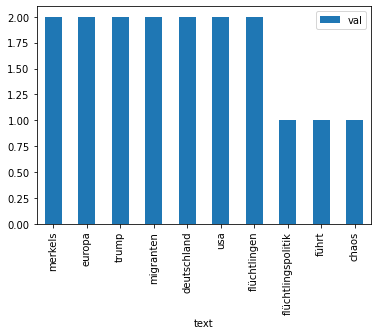

In [ ]:
#lets plot

import matplotlib.pyplot as plt

%matplotlib inline

pd.DataFrame(counts, columns=['text','val']).set_index('text').plot(kind='bar')


# **How does Webscraping work?**
1: Send a request to download the site’s content.

2: Filter the page’s HTML to look for the nedded tags.

3: Print the text inside the target tags, producing the output in the format previously specified in the code.

## Requests

We use the `requests` library to make `html` requests and retrieve webpages.

In [ ]:
import requests


You need to send an HTTP request to the server of the page you want to scrape. 

The server sends the HTML content of the page.

In [ ]:
url= 'https://books.toscrape.com'

session = requests.Session()

page = session.get(url)

print(page.text)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->
    <head>
        <title>
    All products | Books to Scrape - Sandbox
</title>

        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
        <meta name="created" content="24th Jun 2016 09:29" />
        <meta name="description" content="" />
        <meta name="viewport" content="width=device-width" />
        <meta name="robots" content="NOARCHIVE,NOCACHE" />

        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
        <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->

        
            <link rel="shortcut icon" href="static/oscar/favicon.

## BeautifulSoup

BeautifulSoup contains tools for navigating `html` code.

"Beautiful Soup helps you pull particular content from a webpage, remove the HTML markup, and save the information. It is a tool for web scraping that helps you clean up and parse the documents you have pulled down from the web."

Read more here: https://programminghistorian.org/en/lessons/retired/intro-to-beautiful-soup

**HTML: standard markup language for documents designed to be displayed in a web browser.**

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
#we use the html parser

soup=BeautifulSoup(page.text,'html.parser')



In [ ]:
# We print content of the document
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="tex

In [ ]:
# We want to get all the links to the page
# We can use the page 

links=soup.find_all('a',href=True)

links

[<a href="index.html">Books to Scrape</a>,
 <a href="index.html">Home</a>,
 <a href="catalogue/category/books_1/index.html">
                             
                                 Books
                             
                         </a>,
 <a href="catalogue/category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>,
 <a href="catalogue/category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>,
 <a href="catalogue/category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="catalogue/category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
            

In [ ]:
type(links)

bs4.element.ResultSet

In [ ]:
# lets use a loop to print out all the content within the ahref label

for link in links:
  print(link.text, link['href'])



Books to Scrape index.html
Home index.html

                            
                                Books
                            
                         catalogue/category/books_1/index.html

                            
                                Travel
                            
                         catalogue/category/books/travel_2/index.html

                            
                                Mystery
                            
                         catalogue/category/books/mystery_3/index.html

                            
                                Historical Fiction
                            
                         catalogue/category/books/historical-fiction_4/index.html

                            
                                Sequential Art
                            
                         catalogue/category/books/sequential-art_5/index.html

                            
                                Classics
            

In [ ]:
links

[<a href="index.html">Books to Scrape</a>,
 <a href="index.html">Home</a>,
 <a href="catalogue/category/books_1/index.html">
                             
                                 Books
                             
                         </a>,
 <a href="catalogue/category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>,
 <a href="catalogue/category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>,
 <a href="catalogue/category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="catalogue/category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
            

In [ ]:
import re

for link in links:
  print(link['href'],re.sub(re.compile(r'\s'),'', link.text))

index.html BookstoScrape
index.html Home
catalogue/category/books_1/index.html Books
catalogue/category/books/travel_2/index.html Travel
catalogue/category/books/mystery_3/index.html Mystery
catalogue/category/books/historical-fiction_4/index.html HistoricalFiction
catalogue/category/books/sequential-art_5/index.html SequentialArt
catalogue/category/books/classics_6/index.html Classics
catalogue/category/books/philosophy_7/index.html Philosophy
catalogue/category/books/romance_8/index.html Romance
catalogue/category/books/womens-fiction_9/index.html WomensFiction
catalogue/category/books/fiction_10/index.html Fiction
catalogue/category/books/childrens_11/index.html Childrens
catalogue/category/books/religion_12/index.html Religion
catalogue/category/books/nonfiction_13/index.html Nonfiction
catalogue/category/books/music_14/index.html Music
catalogue/category/books/default_15/index.html Default
catalogue/category/books/science-fiction_16/index.html ScienceFiction
catalogue/category/boo

In [ ]:
# That output is annoying, so let's use some regex to remove whitespace

    #result = re.sub(pattern, repl, string, count=0, flags=0);
    #\s: white space charachter

In [ ]:
# It'd be easier to read in a table, so let's use pandas!

import pandas as pd

links_df=pd.DataFrame(
    data={'Label': [re.sub(re.compile(r'\s'),'',link.text) for link in links],
    'Link': [link['href'] for link in links]}
)
links_df

,Label,Link
0,BookstoScrape,index.html
1,Home,index.html
2,Books,catalogue/category/books_1/index.html
3,Travel,catalogue/category/books/travel_2/index.html
4,Mystery,catalogue/category/books/mystery_3/index.html
...,...,...
89,,catalogue/libertarianism-for-beginners_982/ind...
90,LibertarianismforBeginners,catalogue/libertarianism-for-beginners_982/ind...
91,,catalogue/its-only-the-himalayas_981/index.html
92,It'sOnlytheHimalayas,catalogue/its-only-the-himalayas_981/index.html
